In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

c:\Users\Parth Solanke\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1) # reshape Y to be a column vector

n_samples, n_features = X.shape

In [3]:
# 1) Model
input_size = n_features
output_size = 1

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

In [4]:
# 2) Loss and optimizer
learning_rate = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
# 3) Training loop
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    y_predicted = model(X)
    l = loss(y_predicted, Y)
    
    # Backward pass
    l.backward() # dl/dw
    
    # Update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')

epoch: 10, loss = 4465.6284
epoch: 20, loss = 3328.0637
epoch: 30, loss = 2505.6450
epoch: 40, loss = 1910.3956
epoch: 50, loss = 1479.1168
epoch: 60, loss = 1166.3387
epoch: 70, loss = 939.2983
epoch: 80, loss = 774.3576
epoch: 90, loss = 654.4399
epoch: 100, loss = 567.1951


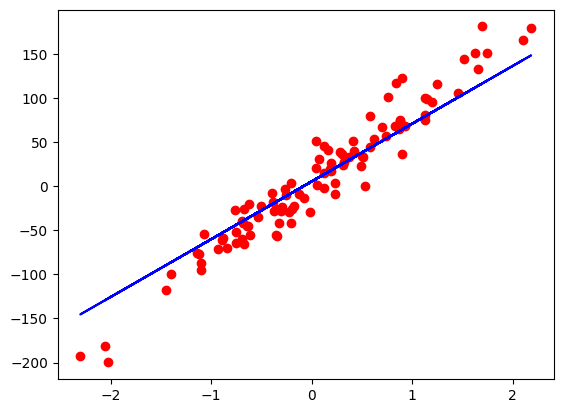

In [6]:
# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()